# Organize the raw Zooniverse dataset

This notebook is to ...

In [319]:
# Basic imports
from pyclouds.imports import *
sns.set_style('darkgrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import and understand the entire dataset

The dataset from 16 December contains the MPI and the LMD classification data, for the real dataset as well as for the practice dataset.

To handle the data we will use some functions from pyclouds.zooniverse

In [320]:
from pyclouds.zooniverse import *

In [321]:
!ls ../zooniverse_raw/

sugar-flower-fish-or-gravel-classifications_18_11_02.csv
sugar-flower-fish-or-gravel-classifications_18_11_30.csv
sugar-flower-fish-or-gravel-classifications_18_12_16.csv
sugar-flower-fish-or-gravel-subjects_18_11_05.csv
sugar-flower-fish-or-gravel-subjects_19_01_14.csv


In [322]:
clas_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-classifications_18_12_16.csv'
subj_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-subjects_19_01_14.csv'

In [323]:
clas = parse_classifications(clas_fn, json_columns=['metadata', 'annotations', 'subject_data'])

This is now a Pandas dataframe with all the information. Each row represents one user's classification for one image.

In [324]:
len(clas)

34616

In [325]:
clas.tail()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
34611,136647387,onnoq,1834851.0,af96bca21f888f9ee82c,8073,Full dataset,13.11,2018-12-14 16:09:42 UTC,NaN,NaN,"{'source': 'api', 'session': '67f9a58fcd31b031...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27142706': {'retired': None, 'fn': '/project...",27142706
34612,136647412,onnoq,1834851.0,af96bca21f888f9ee82c,8073,Full dataset,13.11,2018-12-14 16:09:54 UTC,NaN,NaN,"{'source': 'api', 'session': '67f9a58fcd31b031...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27144789': {'retired': None, 'fn': '/project...",27144789
34613,136647449,onnoq,1834851.0,af96bca21f888f9ee82c,8073,Full dataset,13.11,2018-12-14 16:10:08 UTC,NaN,NaN,"{'source': 'api', 'session': '67f9a58fcd31b031...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27163862': {'retired': None, 'fn': '/project...",27163862
34614,136647469,onnoq,1834851.0,af96bca21f888f9ee82c,8073,Full dataset,13.11,2018-12-14 16:10:14 UTC,NaN,NaN,"{'source': 'api', 'session': '67f9a58fcd31b031...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27143251': {'retired': {'id': 24671973, 'wor...",27143251
34615,136647512,onnoq,1834851.0,af96bca21f888f9ee82c,8073,Full dataset,13.11,2018-12-14 16:10:28 UTC,NaN,NaN,"{'source': 'api', 'session': '67f9a58fcd31b031...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27147693': {'retired': None, 'fn': '/project...",27147693


In [326]:
clas.user_id.nunique(), clas.user_name.nunique(), clas.subject_ids.nunique()   # Number of unique users and images = subjects

(72, 91, 9801)

User_id is only for logged in users, so we have around 20 users that were not logged in. Let's see how many labels correspond to those users.

In [327]:
len(clas[clas.user_name.apply(lambda u: 'not-logged-in' in u)])

444

So only, a small fraction of labels is from not-logged-in users. For ease of analysis, we should probably remove those.

In [328]:
clas.workflow_id.unique()

array([8072, 8073, 8104, 8109, 8414])

In [329]:
clas.workflow_name.unique()

array(['Practice', 'Full dataset', 'Tutorial Gold standard',
       'Tutorial Random', 'Validation'], dtype=object)

We really only care about the `Practice` and `Full dataset` workflows.

In [330]:
clas[clas.workflow_name == 'Practice'].workflow_version.unique()

array([19.13, 24.13])

In [331]:
clas[clas.workflow_name == 'Full dataset'].workflow_version.unique()

array([13.11])

Let's now also convert the `created_at` column to an actual datetime object that we can work with.

In [332]:
clas['datetime'] = pd.to_datetime(clas['created_at'])

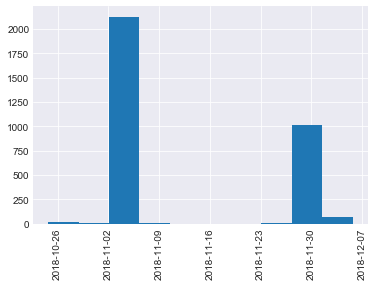

In [333]:
clas[clas.workflow_name == 'Practice'].datetime.hist()
plt.xticks(rotation=90);

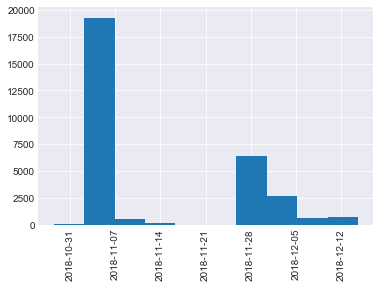

In [334]:
clas[clas.workflow_name == 'Full dataset'].datetime.hist()
plt.xticks(rotation=90);

Here we can see the two spikes associated with the MPI and LMD labeling days. The LMD day seems to have a larger "tail".

## Add subject information

In [335]:
subj = load_classifications(subj_fn)

In [336]:
len(subj)

10179

In [337]:
subj.tail()

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at
10174,27164038,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",4,2018-11-29 14:26:48 UTC,classification_count,2018-10-29 12:15:26 UTC,2018-10-29 12:15:26 UTC
10175,27164039,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",4,2018-11-30 13:26:41 UTC,classification_count,2018-10-29 12:15:27 UTC,2018-10-29 12:15:27 UTC
10176,27164040,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",4,2018-12-30 13:00:38 UTC,classification_count,2018-10-29 12:15:28 UTC,2018-10-29 12:15:28 UTC
10177,27164041,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",4,2018-12-01 22:35:27 UTC,classification_count,2018-10-29 12:15:31 UTC,2018-10-29 12:15:31 UTC
10178,27164042,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",3,NaN,NaN,2018-10-29 12:15:33 UTC,2018-10-29 12:15:33 UTC


In [339]:
subj.set_index('subject_id', inplace=True)

In [350]:
subj.head()

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at
0,26976345,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:28 UTC,2018-10-24 16:42:28 UTC
1,26976346,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:29 UTC,2018-10-24 16:42:29 UTC
2,26976347,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:31 UTC,2018-10-24 16:42:31 UTC
3,26976348,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:32 UTC,2018-10-24 16:42:32 UTC
4,26976349,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:33 UTC,2018-10-24 16:42:33 UTC


In [341]:
clas[clas.subject_ids == 26976410]

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,datetime
13,128932300,raspstephan,1814911.0,ece34b7062ff27190425,8073,Full dataset,13.11,2018-10-28 10:00:31 UTC,NaN,NaN,"{'source': 'api', 'session': '72e7236d3736b33e...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976410': {'retired': None, 'fn': '/project...",26976410,2018-10-28 10:00:31


In [342]:
clas['subject_set_id'] = clas.subject_ids.apply(
    lambda i: subj.loc[i].subject_set_id if i in list(subj.index) else np.nan) 

The first row is still from a now deleted dataset, so let's remove that!

In [343]:
clas.dropna(subset=['subject_set_id'], inplace=True)

In [351]:
#EXPORT
def add_subject_set_id_to_clas_df(clas_df, subj_df):
    s = subj_df.set_index('subject_id')
    # HARDCODED: Only using the actual datasets, not practice, etc.
    s = s[s.subject_set_id.apply(lambda s: s in subj_id2name.keys())]
    clas_df['subject_set_id'] = clas_df.subject_ids.apply(
        lambda i: s.loc[i].subject_set_id if i in list(s.index) else np.nan)
    clas_df.dropna(subset=['subject_set_id'], inplace=True)
    return clas_df

In [345]:
subj = load_classifications(subj_fn)

In [347]:
%time clas = add_subject_set_id_to_clas_df(clas, subj)

CPU times: user 18.6 s, sys: 0 ns, total: 18.6 s
Wall time: 18.6 s


## Splitting the dataset

To work with the dataset, we would like to have easy ways of splitting the data and removing outliers.

First up, we can throw out all not-logged-in users.

Then, we want to split the practice and full dataset workflows, and throw out the 19.13 workflow for the practice dataset which was not live but just for testing. 

Finally, we can split the MPI and LMD datasets by time.

At the end we can also write a function that does all this in one step for use in other notebooks.

In [ ]:
clas_drop = clas[clas.user_name.apply(lambda u: 'not-logged-in' not in u)]

In [ ]:
len(clas_drop)

In [ ]:
clas_full = clas_drop[clas_drop.workflow_name == 'Full dataset']
clas_prac = clas_drop[(clas_drop.workflow_name == 'Practice') & (clas_drop.workflow_version == 24.13)]

In [65]:
len(clas_full), len(clas_prac)

(30311, 3015)

In [71]:
split_date = np.datetime64('2018-11-28')

In [73]:
clas_full_MPI = clas_full[clas_full.datetime.dt.date < split_date]
clas_full_LMD = clas_full[clas_full.datetime.dt.date > split_date]

In [74]:
len(clas_full_MPI), len(clas_full_LMD)

(19898, 10410)

In [210]:
#EXPORT
def split_classification_df(raw_df, workflow_name=None, workflow_version=None, date_range=None, drop_nli=False):
    """
    Takes as input the raw classification dataframe that comes out of parse_classifications().
    Adds a datetime column. If not None, returns only rows with workflow_name, workflow_version.
    Optionally, returns only labels in a certain date range. Dates must be in string format 'yyyy-mm-dd'.
    Optionally, drops all labels of users that were not-logged-in (nli).
    """
    df = raw_df.copy()
    df['datetime'] = pd.to_datetime(df['created_at'])
    if workflow_name is not None:
        df = df[df.workflow_name == workflow_name]
    if workflow_version is not None:
        df = df[df.workflow_version == workflow_version]
    if date_range is not None:
        df = df[(df.datetime.dt.date > np.datetime64(date_range[0])) & 
                (df.datetime.dt.date < np.datetime64(date_range[1]))]
    if drop_nli:
        df = df[df.user_name.apply(lambda u: 'not-logged-in' not in u)]
    return df

In [94]:
%%time
clas_full_LMD_test = split_classification_df(
    clas, 
    workflow_name='Full dataset', 
    date_range=('2018-11-28', '2019-01-01'),
    drop_nli=True
)

CPU times: user 4.47 s, sys: 0 ns, total: 4.47 s
Wall time: 4.47 s


In [95]:
len(clas_full_LMD_test)

10410

This function is now also in pyclouds.zooniverse

## Extracting the label information

The label information is hidden in the `annotations` column, which is a dictionary. There can be more than one annotation/label for each user and image.

In [118]:
clas.metadata.iloc[-1]

{'source': 'api',
 'session': '67f9a58fcd31b0313ab8dde7d0ded6a74e2732ab43444073c767a66ba164960a',
 'viewport': {'width': 1462, 'height': 1266},
 'started_at': '2018-12-14T16:10:12.234Z',
 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:63.0) Gecko/20100101 Firefox/63.0',
 'utc_offset': '-3600',
 'finished_at': '2018-12-14T16:10:26.570Z',
 'live_project': True,
 'interventions': {'opt_in': True, 'message': False},
 'user_language': 'en',
 'user_group_ids': [],
 'subject_dimensions': [{'clientWidth': 956,
   'clientHeight': 637,
   'naturalWidth': 2100,
   'naturalHeight': 1400}],
 'workflow_translation_id': '7573'}

In [102]:
clas.annotations.iloc[-1]

{'task': 'T0',
 'task_label': 'Draw bounding boxes around cloud regions',
 'value': [{'x': 1059.060791015625,
   'y': 254.72518920898438,
   'tool': 1,
   'frame': 0,
   'width': 924.7423095703125,
   'height': 542.5449523925781,
   'details': [],
   'tool_label': 'Flower'},
  {'x': 327.6136474609375,
   'y': 202.00827026367188,
   'tool': 0,
   'frame': 0,
   'width': 610.6375122070312,
   'height': 1140.0032043457031,
   'details': [],
   'tool_label': 'Sugar'}]}

To be able to handle the data well, we will now create a new DataFrame that contains one row per bounding box. This will then allow us more easily to handle the data later. In this process, we will also extract the coordinate data plus some more meta data we might need.

In [153]:
# We need to figure out first how many items we have in order to allocate the new DataFrame
count = 0
for i, row in clas.iterrows():
    for anno in row.annotations['value']:
        count += 1
count

49802

In [162]:
annos = pd.DataFrame(
    columns=list(clas.columns) + ['x', 'y', 'width', 'height', 'tool_label', 'started_at', 'finished_at'],
    index=np.arange(count)
)

In [163]:
for i, row in clas_prac.iterrows():
    j = 0
    for anno in row.annotations['value']:
        for c in clas.columns:
            annos.iloc[j][c] = row[c]
        for coord in ['x', 'y', 'width', 'height', 'tool_label']:
            annos.iloc[j][coord] = anno[coord]
        for meta in ['started_at', 'finished_at']:
            annos.iloc[j][meta] = row.metadata[meta]
        j += 1

In [164]:
annos.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,subject_data,subject_ids,datetime,x,y,width,height,tool_label,started_at,finished_at
0,134717413,raspstephan,1.81491e+06,08ce726fe14db3753a3a,8072,Practice,24.13,2018-12-05 16:28:26 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-05 16:28:26,593.934,183.632,1464.12,771.5,Fish,2018-12-05T16:27:54.218Z,2018-12-05T16:28:26.348Z
1,134315538,Octave.T,1.84892e+06,2ac8c22966cc5803ff03,8072,Practice,24.13,2018-12-02 19:13:11 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-02 19:13:11,42.0593,91.324,560.791,1237.69,Flower,2018-12-02T19:12:43.974Z,2018-12-02T19:13:10.990Z
2,134291826,Octave.T,1.84892e+06,620258a9fdcdbf5ffd60,8072,Practice,24.13,2018-12-02 14:44:18 UTC,NaN,NaN,...,"{'27139670': {'retired': None, 'fn': '/project...",27139670,2018-12-02 14:44:18,746.135,657.055,573.143,269.278,Sugar,2018-12-02T14:43:22.889Z,2018-12-02T14:44:17.630Z
3,134291826,Octave.T,1.84892e+06,620258a9fdcdbf5ffd60,8072,Practice,24.13,2018-12-02 14:44:18 UTC,NaN,NaN,...,"{'27139670': {'retired': None, 'fn': '/project...",27139670,2018-12-02 14:44:18,1351.39,647.174,743.603,261.867,Gravel,2018-12-02T14:43:22.889Z,2018-12-02T14:44:17.630Z
4,134131944,szantai,1.84802e+06,64fa4262a2ff763c7884,8072,Practice,24.13,2018-11-30 22:29:48 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-11-30 22:29:48,1448.07,19.8344,646.612,415.193,Gravel,2018-11-30T22:28:00.115Z,2018-11-30T22:29:48.472Z


In [165]:
annos[(annos.subject_ids == 27140443) & (annos.user_name == 'raspstephan')]

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,subject_data,subject_ids,datetime,x,y,width,height,tool_label,started_at,finished_at
0,134717413,raspstephan,1.81491e+06,08ce726fe14db3753a3a,8072,Practice,24.13,2018-12-05 16:28:26 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-05 16:28:26,593.934,183.632,1464.12,771.5,Fish,2018-12-05T16:27:54.218Z,2018-12-05T16:28:26.348Z


In [208]:
#EXPORT
def convert_clas_to_annos_df(clas_df):
    """
    Converts a classification pd.DataFrame parsed from the raw Zooniverse file to a pd.DataFrame
    that has one row per bounding box. 
    Additionally, extracts coordinate and metadata information
    """
    # We need to figure out first how many items we have in order to allocate the new DataFrame
    count = 0
    for i, row in clas_df.iterrows():
        for anno in row.annotations['value']:
            count += 1
    # Allocate new dataframe
    annos_df = pd.DataFrame(
        columns=list(clas_df.columns) + ['x', 'y', 'width', 'height', 'tool_label', 'started_at', 'finished_at'],
        index=np.arange(count)
    )
    # go through each annotation
    j = 0
    for i, row in clas_df.iterrows():
        for anno in row.annotations['value']:
            for c in clas_df.columns:
                annos_df.iloc[j][c] = row[c]
            for coord in ['x', 'y', 'width', 'height', 'tool_label']:
                annos_df.iloc[j][coord] = anno[coord]
            for meta in ['started_at', 'finished_at']:
                annos_df.iloc[j][meta] = row.metadata[meta]
            j += 1
    # Convert start and finish times to datetime
    for meta in ['started_at', 'finished_at']:
        annos_df[meta] = pd.to_datetime(annos_df[meta])
    return annos_df

In [209]:
%%time
annos_prac = convert_clas_to_annos_df(clas_prac)

CPU times: user 10 s, sys: 0 ns, total: 10 s
Wall time: 10 s


In [184]:
annos_prac.tail()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,subject_data,subject_ids,datetime,x,y,width,height,tool_label,started_at,finished_at
4582,134315477,Octave.T,1.84892e+06,2ac8c22966cc5803ff03,8072,Practice,24.13,2018-12-02 19:12:20 UTC,NaN,NaN,...,"{'27140553': {'retired': None, 'fn': '/project...",27140553,2018-12-02 19:12:20,59.3524,27.0925,1178.4,795.483,Gravel,2018-12-02 19:11:53.686,2018-12-02 19:12:20.367
4583,134315508,Octave.T,1.84892e+06,2ac8c22966cc5803ff03,8072,Practice,24.13,2018-12-02 19:12:44 UTC,NaN,NaN,...,"{'27139921': {'retired': None, 'fn': '/project...",27139921,2018-12-02 19:12:44,108.761,886.807,1991.18,511.381,Sugar,2018-12-02 19:12:20.436,2018-12-02 19:12:43.824
4584,134315538,Octave.T,1.84892e+06,2ac8c22966cc5803ff03,8072,Practice,24.13,2018-12-02 19:13:11 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-02 19:13:11,610.261,9.79941,1482.27,864.655,Fish,2018-12-02 19:12:43.974,2018-12-02 19:13:10.990
4585,134315538,Octave.T,1.84892e+06,2ac8c22966cc5803ff03,8072,Practice,24.13,2018-12-02 19:13:11 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-02 19:13:11,42.0593,91.324,560.791,1237.69,Flower,2018-12-02 19:12:43.974,2018-12-02 19:13:10.990
4586,134717413,raspstephan,1.81491e+06,08ce726fe14db3753a3a,8072,Practice,24.13,2018-12-05 16:28:26 UTC,NaN,NaN,...,"{'27140443': {'retired': None, 'fn': '/project...",27140443,2018-12-05 16:28:26,593.934,183.632,1464.12,771.5,Fish,2018-12-05 16:27:54.218,2018-12-05 16:28:26.348
